In [6]:
import jeulib as jl

game = jl.Jeu()
game.demarrer()

Quel type de joueur souhaitez vous sélectionner pour noir ? Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>
Quel type de joueur souhaitez vous sélectionner pour blanc ?
Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>


### TEST pour random

In [2]:
game = jl.Jeu()
game.demarrer()

Quel type de joueur souhaitez vous sélectionner pour noir ? Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>
Quel type de joueur souhaitez vous sélectionner pour blanc ?
Les possibilités sont :
1  : <class 'joueurlib.Humain'>
2  : <class 'joueurlib.Random'>
3  : <class 'joueurlib.Minmax'>
4  : <class 'joueurlib.AlphaBeta'>


invalid command name ".!button"
    while executing
"$w cget -state"
    (procedure "tk::ButtonDown" line 12)
    invoked from within
"tk::ButtonDown .!button"
    (command bound to event)


### 4. Implementez l’algorithme minmax en limitant la profondeur de l’exploration (vous pourrez prendre une profondeur 5, et augmenter en fonction des capacit´es de votre machine). Vous pourrez utiliser la m´ethode copie de la classe Plateau pour pouvoir explorer diff´erents noeuds sans impacter la partie en cours.

In [ ]:
def minmax(self, couleurval, profondeur = 3, maximiser=True):
		plateau = self.jeu.plateau.copie()
		if profondeur == 0 or not plateau.existe_coup_valide(couleurval):
			return self.fct_evaluation(plateau, couleurval), None
		if maximiser:
			M = -np.inf
			coups_possibles = plateau.liste_coups_valides(couleurval)
			argmax = None
			for coup in coups_possibles:
				plateau_apres = plateau.copie()
				plateau_apres.jouer(coup, couleurval)
				self.nb_appels_jouer += 1
				val, _ = self.minmax(-couleurval, profondeur-1,False)
				if M < val:
					M = val
					argmax = coup
			return M, argmax
		else:
			M = np.inf
			coups_possibles = plateau.liste_coups_valides(couleurval)
			argmin = None
			for coup in coups_possibles:
				plateau_apres = plateau.copie()
				plateau_apres.jouer(coup, couleurval)
				self.nb_appels_jouer += 1
				val, _ = self.minmax(-couleurval, profondeur-1,True)					
				if M > val:
					M = val
					argmin = coup
			return M, argmin

### 7. Quel int´erˆet voyez vous `a avoir ces deux compteurs diff´erents ? Comment evoluent-ils lun par rapport a l’autre ?

### Intérêt des Deux Compteurs

Les deux compteurs mesurent des choses différentes :

1. **Nombre de nœuds explorés** : Ce compteur montre combien de fois l'algorithme a simulé des coups. Il donne une idée de la profondeur et de l'étendue de l'exploration de l'algorithme.

2. **Temps de calcul** : Ce compteur montre combien de temps réel l'algorithme prend pour effectuer les calculs. Il est influencé par la puissance de l'ordinateur et l'efficacité de l'algorithme.

## Évolution des Compteurs

Quand on augmente la profondeur de l'algorithme :

- **Nombre de nœuds explorés** : Ce nombre augmente de manière exponentielle. Plus la profondeur est grande, plus l'algorithme doit explorer de nœuds pour trouver le meilleur coup.

- **Temps de calcul** : Le temps de calcul suit également une augmentation rapide, mais il peut être ralenti par la puissance de l'ordinateur. Un ordinateur plus puissant peut réduire le temps de calcul, mais l'augmentation de la profondeur aura toujours un impact significatif.

Ces deux mesures permettent de voir si l’algorithme est efficace ou s’il prend trop de temps. Le nombre de nœuds explorés montre l'étendue de l'exploration, tandis que le temps de calcul montre l'efficacité en temps réel. ils aident à évaluer la performance de l'algorithme et à identifier les points à optimiser.

### 8. Tracez une courbe montrant comment les deux compteurs varient en fonction du choix de la profondeur maximale.

Temps d'exécution minmax : 0.01 secondes
Temps d'exécution minmax : 0.01 secondes
Temps d'exécution minmax : 0.02 secondes
Temps d'exécution minmax : 0.03 secondes
Temps d'exécution minmax : 0.04 secondes
Temps d'exécution minmax : 0.05 secondes
Temps d'exécution minmax : 0.06 secondes
Temps d'exécution minmax : 0.07 secondes
Temps d'exécution minmax : 0.08 secondes
Temps d'exécution minmax : 0.09 secondes
Temps d'exécution minmax : 0.09 secondes
Temps d'exécution minmax : 0.10 secondes
Temps d'exécution minmax : 0.11 secondes
Temps d'exécution minmax : 0.12 secondes
Temps d'exécution minmax : 0.13 secondes
Temps d'exécution minmax : 0.13 secondes
Temps d'exécution minmax : 0.14 secondes
Temps d'exécution minmax : 0.15 secondes
Temps d'exécution minmax : 0.15 secondes
Temps d'exécution minmax : 0.16 secondes
Temps d'exécution minmax : 0.17 secondes
Temps d'exécution minmax : 0.17 secondes
Temps d'exécution minmax : 0.17 secondes
Temps d'exécution minmax : 0.18 secondes
Temps d'exécutio

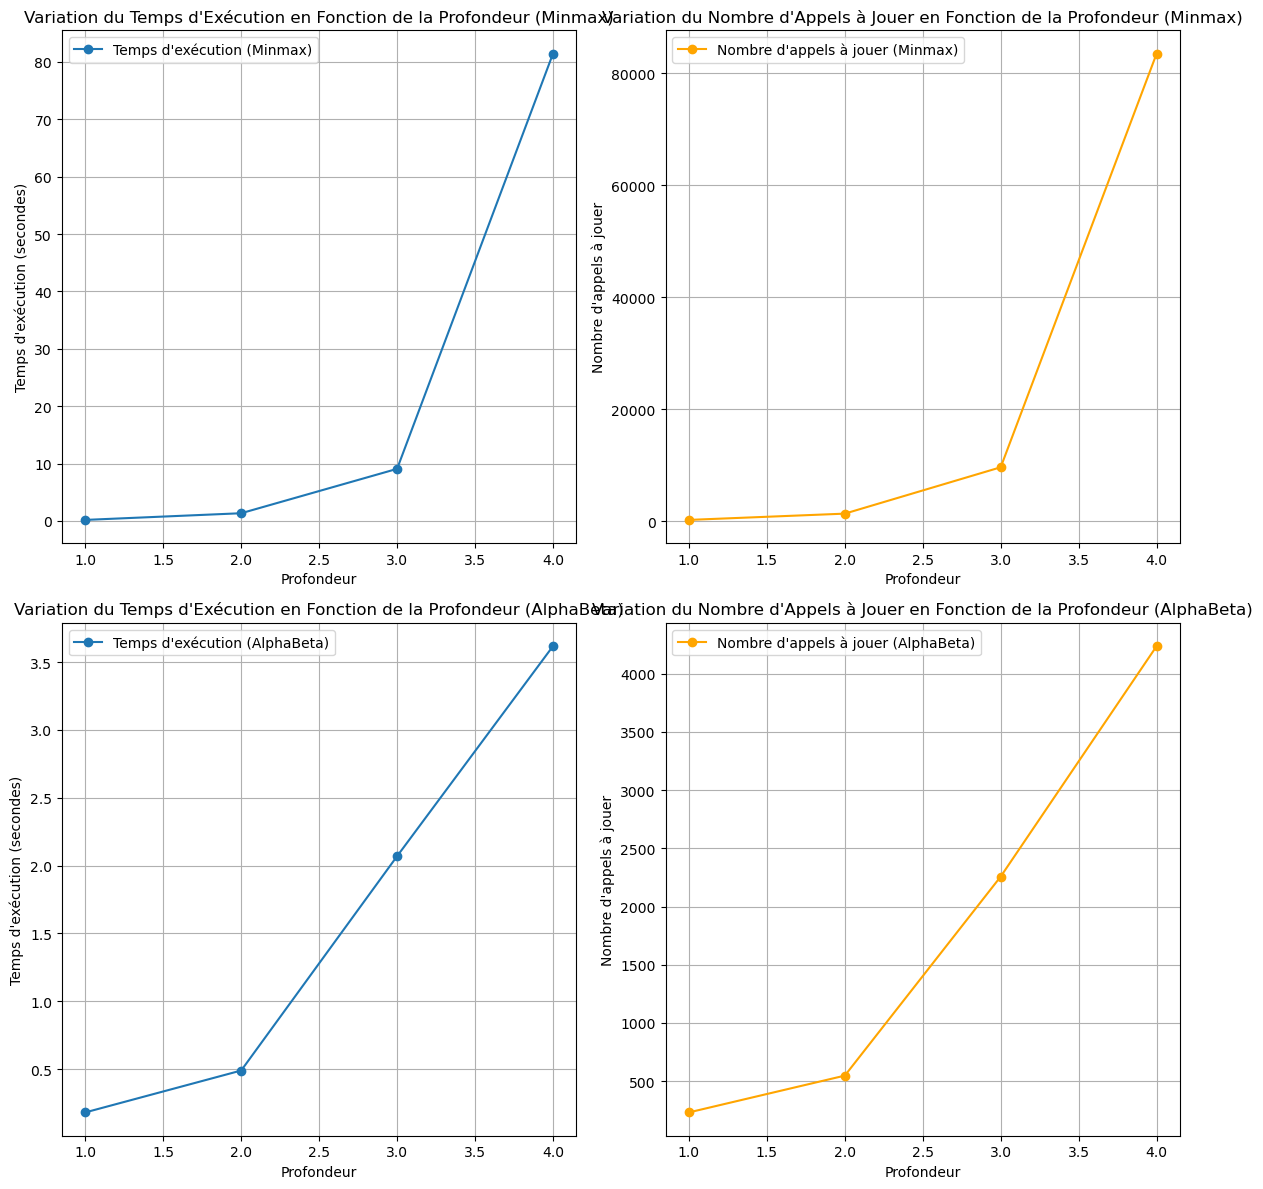

In [2]:
jl.test_profondeur()


### 9. Ajoutez une fonction permettant de simuler n parties entre deux IA, et donnant le nombre de victoires, score moyen ainsi que le temps moyen de calcul pour chaque camp.

In [3]:
jl.Question_9()

Profondeur 1:
Temps d'exécution minmax : 0.01 secondes
Temps d'exécution minmax : 0.02 secondes
Temps d'exécution minmax : 0.02 secondes
Temps d'exécution minmax : 0.03 secondes
Temps d'exécution minmax : 0.05 secondes
Temps d'exécution minmax : 0.06 secondes
Temps d'exécution minmax : 0.07 secondes
Temps d'exécution minmax : 0.08 secondes
Temps d'exécution minmax : 0.09 secondes
Temps d'exécution minmax : 0.10 secondes
Temps d'exécution minmax : 0.11 secondes
Temps d'exécution minmax : 0.13 secondes
Temps d'exécution minmax : 0.14 secondes
Temps d'exécution minmax : 0.15 secondes
Temps d'exécution minmax : 0.16 secondes
Temps d'exécution minmax : 0.17 secondes
Temps d'exécution minmax : 0.18 secondes
Temps d'exécution minmax : 0.18 secondes
Temps d'exécution minmax : 0.19 secondes
Temps d'exécution minmax : 0.20 secondes
Temps d'exécution minmax : 0.20 secondes
Temps d'exécution minmax : 0.21 secondes
Temps d'exécution minmax : 0.21 secondes
Temps d'exécution minmax : 0.21 secondes
Te

### 11. Sans faire l’exp´erience, quel sera `a votre avis le r´esultat de 100 parties avec Minmax en joueur noir et Alpha-Beta en joueur blanc, et pourquoi ?

Sans faire l'expérience, je pense que sur 100 parties avec Minmax en joueur noir et Alpha-Beta en joueur blanc ca va etre une partie nulle pour une meme profondeur, sinon Alpha-Beta gagnerait probablement plus de parties. La raison est que l'algorithme Alpha-Beta est une version optimisée de Minmax. Il explore le même arbre de jeu mais coupe les branches inutiles, ce qui lui permet de trouver des coups équivalents ou meilleurs plus rapidement. En théorie, cela devrait donner un avantage à Alpha-Beta, car il peut atteindre des évaluations plus précises en moins de temps.

### 12. Comparez les performances de temps avec Minmax, en faisant varier la profondeur maximale.

Temps d'exécution minmax : 0.01 secondes
Temps d'exécution minmax : 0.01 secondes
Temps d'exécution minmax : 0.03 secondes
Temps d'exécution minmax : 0.03 secondes
Temps d'exécution minmax : 0.04 secondes
Temps d'exécution minmax : 0.05 secondes
Temps d'exécution minmax : 0.07 secondes
Temps d'exécution minmax : 0.08 secondes
Temps d'exécution minmax : 0.09 secondes
Temps d'exécution minmax : 0.10 secondes
Temps d'exécution minmax : 0.10 secondes
Temps d'exécution minmax : 0.11 secondes
Temps d'exécution minmax : 0.12 secondes
Temps d'exécution minmax : 0.13 secondes
Temps d'exécution minmax : 0.13 secondes
Temps d'exécution minmax : 0.14 secondes
Temps d'exécution minmax : 0.15 secondes
Temps d'exécution minmax : 0.15 secondes
Temps d'exécution minmax : 0.15 secondes
Temps d'exécution minmax : 0.15 secondes
Temps d'exécution minmax : 0.16 secondes
Temps d'exécution minmax : 0.17 secondes
Temps d'exécution minmax : 0.17 secondes
Temps d'exécution minmax : 0.17 secondes
Temps d'exécutio

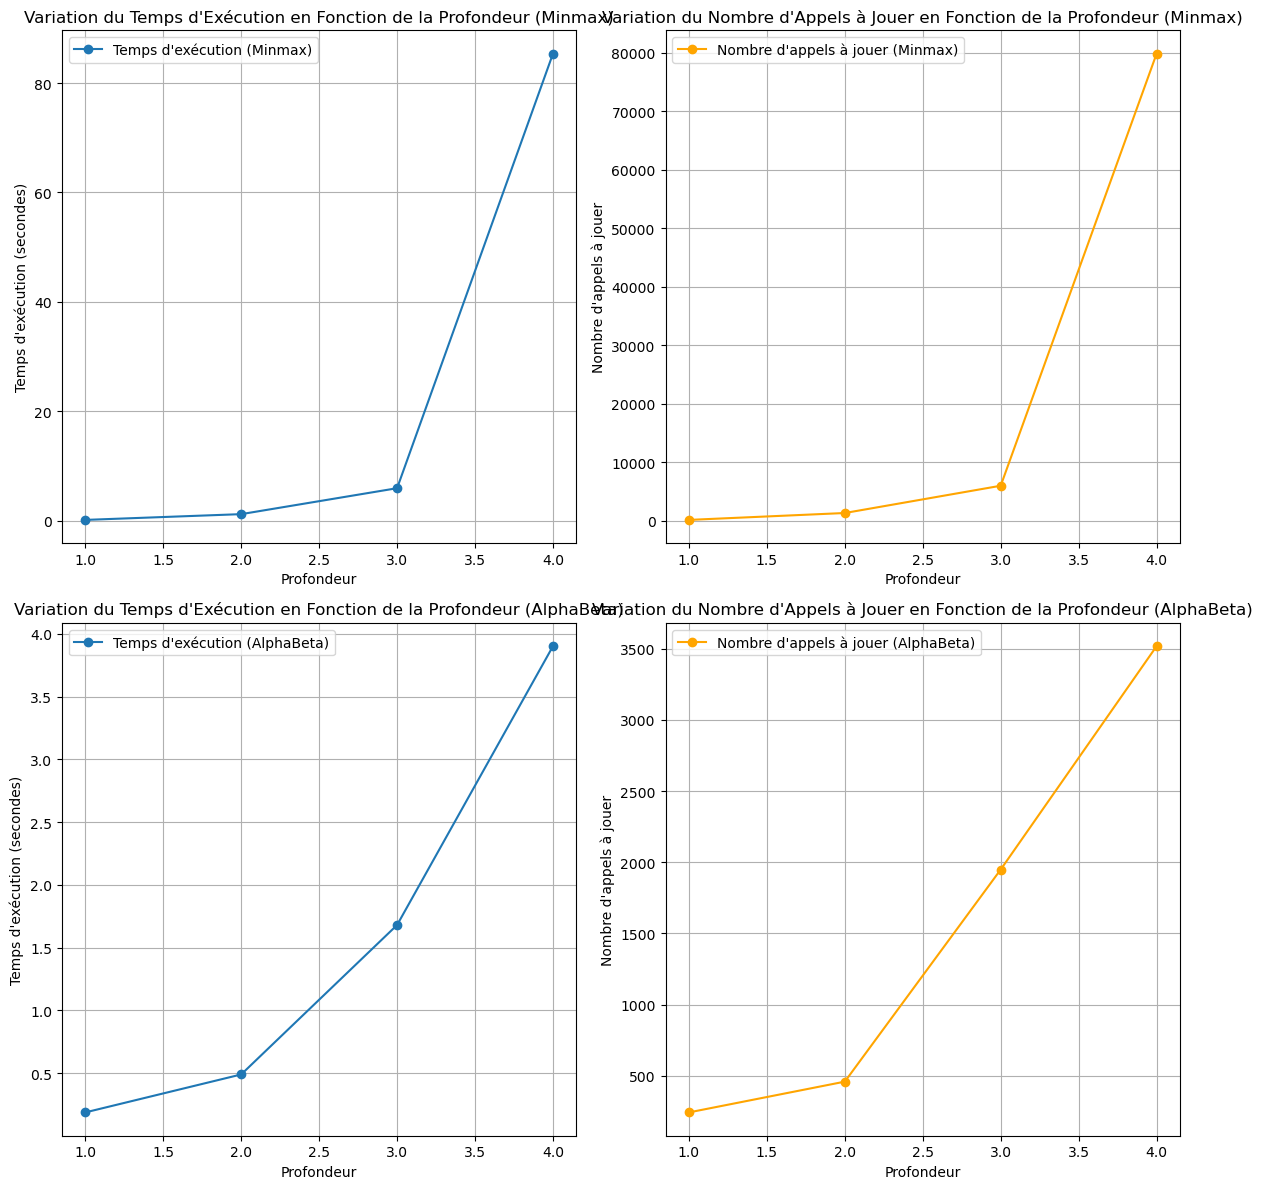

In [4]:
# Je modifie la fonction d'avant pour minimax cette fois pour rajouter alpha et beta

jl.test_profondeur()

### 14. Comparez cette nouvelle version `a l’ancienne.

Victoire de noir, avec 43 points contre 21.
Victoires Noir: 5, Victoires Blanc: 0
Score moyen Noir: 43.6, Score moyen Blanc: 19.6
Temps moyen de calcul Noir: 4.8677606105804445 secondes, Temps moyen de calcul Blanc: 0.0 secondes


Résultats finaux de toutes les parties jouées (AlphaBeta Optimisé):
Total Victoires Noir: 10, Total Victoires Blanc: 0
Score moyen Noir: 43.8, Score moyen Blanc: 18.8
Temps moyen de calcul Noir: 2.87998480796814 secondes, Temps moyen de calcul Blanc: 0.0 secondes


On remarque que la version optimisé a un temps moyen de calcul moins important que la version non optimisé
l'optimisation par ordonnancement des coups permet à l'algorithme Alpha-Beta de réduire significativement le nombre de nœuds explorés, ce qui se traduit par un temps de calcul moyen plus faible par rapport à la version non optimisée.

In [4]:
jl.comparer_alphabeta()

Profondeur 1 (AlphaBeta):
Temps d'exécution : 0.01 secondes
Temps d'exécution : 0.02 secondes
Temps d'exécution : 0.02 secondes
Temps d'exécution : 0.03 secondes
Temps d'exécution : 0.05 secondes
Temps d'exécution : 0.06 secondes
Temps d'exécution : 0.07 secondes
Temps d'exécution : 0.08 secondes
Temps d'exécution : 0.10 secondes
Temps d'exécution : 0.11 secondes
Temps d'exécution : 0.11 secondes
Temps d'exécution : 0.12 secondes
Temps d'exécution : 0.13 secondes
Temps d'exécution : 0.14 secondes
Temps d'exécution : 0.15 secondes
Temps d'exécution : 0.16 secondes
Temps d'exécution : 0.17 secondes
Temps d'exécution : 0.17 secondes
Temps d'exécution : 0.18 secondes
Temps d'exécution : 0.18 secondes
Temps d'exécution : 0.18 secondes
Temps d'exécution : 0.19 secondes
Temps d'exécution : 0.19 secondes
Temps d'exécution : 0.19 secondes
Temps d'exécution : 0.20 secondes
Temps d'exécution : 0.20 secondes
Temps d'exécution : 0.20 secondes
Temps d'exécution : 0.20 secondes
Temps d'exécution : 0.